BASIC EXAMPLE OF InMemorySaver IN LANGGRAPH

In [9]:
from langgraph.checkpoint.memory import InMemorySaver
from langgraph.graph import StateGraph, END
from langchain_core.messages import AIMessage, HumanMessage, BaseMessage
from typing import TypedDict, List

In [10]:
class State(TypedDict):
    messages : List[BaseMessage]

In [11]:
workflow = StateGraph(State)
workflow.add_node("agent", lambda state:{"messages": state['messages'] + [AIMessage(content = "Hello")]})
workflow.add_edge("agent", END)
workflow.set_entry_point("agent")

checkpointer = InMemorySaver()

graph = workflow.compile(checkpointer=checkpointer)

config = {'configurable': {'thread_id': '1'}}
input_message = HumanMessage(content= "hi" )
result = graph.invoke({ "messages" : [input_message]}, config)
print(result['messages'])

[HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello', additional_kwargs={}, response_metadata={})]


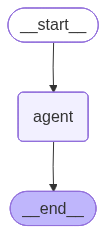

In [13]:
from IPython.display import Image
Image(graph.get_graph().draw_mermaid_png())

In [ ]:
state = graph.get_state(config)
print(state.values)

{'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello', additional_kwargs={}, response_metadata={})]}


In [ ]:
for checkpoint in graph.get_state_history(config):
    print(checkpoint.values)

{'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={}), AIMessage(content='Hello', additional_kwargs={}, response_metadata={})]}
{'messages': [HumanMessage(content='hi', additional_kwargs={}, response_metadata={})]}
{}
